In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/iris.data")

In [4]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
df.shape

(149, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df=df.loc[:,['5.1','3.5']]

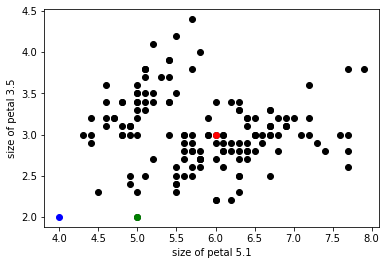

In [9]:
np.random.seed(20)
k=3
centroids={i+1: [np.random.randint(4.3,7.9),np.random.randint(2,4.4)]
           for i in range (k)}
plt.scatter(df['5.1'],df['3.5'],color='k')
colmap={1:'r',2:'b',3:'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color =colmap[i])   
plt.xlabel('size of petal 5.1')
plt.ylabel('size of petal 3.5')
plt.show() 

In [22]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt(
            (df['5.1']-centroids[i][0])**2+(df['3.5']-centroids[i][1])**2)
        )
    centroid_distance_cols =['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('dsitance_from_')))
    return df

In [24]:
df=assignment(df,centroids)
df

,5.1,3.5,distance_from_1,distance_from_2,distance_from_3,closest
0,4.9,3.0,1.100000,1.345362,1.004988,3
1,4.7,3.2,1.315295,1.389244,1.236932,3
2,4.6,3.1,1.403567,1.252996,1.170470,3
3,5.0,3.6,1.166190,1.886796,1.600000,1
4,5.4,3.9,1.081665,2.360085,1.941649,1
...,...,...,...,...,...,...
144,6.7,3.0,0.700000,2.879236,1.972308,1
145,6.3,2.5,0.583095,2.353720,1.392839,1
146,6.5,3.0,0.500000,2.692582,1.802776,1
147,6.2,3.4,0.447214,2.607681,1.843909,1


In [34]:
import copy
old_centroids = copy.deepcopy(centroids) 
def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['5.1'])
        centroids[i][1]=np.mean(df[df['closest']==i]['3.5'])
    return k
centroids = update(centroids)    

In [35]:
centroids

{1: [6.034126984126987, 3.09920634920635],
 2: [4.4, 2.88],
 3: [4.949999999999999, 2.761111111111111]}

In [37]:
df=assignment(df,centroids)
df

,5.1,3.5,distance_from_1,distance_from_2,distance_from_3,closest
0,4.9,3.0,1.138458,0.514198,0.244065,3
1,4.7,3.2,1.337929,0.438634,0.505097,2
2,4.6,3.1,1.434127,0.297321,0.487181,2
3,5.0,3.6,1.149005,0.937230,0.840378,3
4,5.4,3.9,1.021463,1.428426,1.224568,1
...,...,...,...,...,...,...
144,6.7,3.0,0.673223,2.303128,1.766230,1
145,6.3,2.5,0.655543,1.937627,1.375020,1
146,6.5,3.0,0.476319,2.103426,1.568301,1
147,6.2,3.4,0.343498,1.873606,1.403809,1


In [38]:
centroids = update(centroids)    

In [39]:
centroids

{1: [6.295959595959594, 3.0414141414141427],
 2: [4.569230769230769, 3.1461538461538465],
 3: [5.1, 3.0432432432432437]}

In [40]:
while True:
    closest_centroids =df['closest'].copy(deep=True)
    centroids=update(centroids)
    df=assignment(df,centroids)
    if closest_centroids.equals(df['closest']):
        break
        

In [41]:
centroids

{1: [6.823913043478258, 3.0782608695652165],
 2: [5.001999999999999, 3.398],
 3: [5.800000000000001, 2.6999999999999997]}

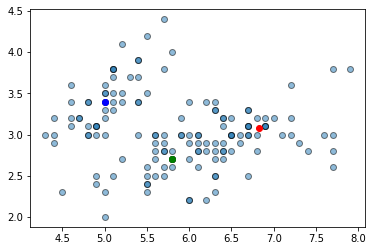

In [48]:
plt.scatter(df['5.1'],df['3.5'],alpha=0.5,edgecolors='k')
colmap={1:'r',2:'b',3:'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color =colmap[i])   

In [32]:
centroid_dist_cols =['distance_from_{}'.format(i) for i in centroids.keys()]
centroid_dist_cols

['distance_from_1', 'distance_from_2', 'distance_from_3']

In [33]:
np.random.seed(20)
k=3
centroids={i+1: [np.random.randint(4.3,7.9),np.random.randint(2,4.4)]
           for i in range (k)}

In [13]:
centroids

{1: [6, 3], 2: [4, 2], 3: [5, 2]}

In [73]:
np.random.randint(4.4,51)

30

In [40]:
# importing random module
import random
  
random.seed(3)
  
# print a random number between 1 and 1000.
print(random.randint(1, 1000))
  
# if you want to get the same random number again then,
random.seed(4) 
print(random.randint(1, (4.3,7.9)))
  
# If seed function is not used
  
# Gives totally unpredictable responses.
print(random.randint(1, 1000))

244
242
311


In [38]:
print(random.randint(1, 1000))

558


In [41]:
random.seed(4) 
print(random.randint(1, 1000))

242
